# Resume Parser
Name: Sitthiwat Damrongpreechar
<br>
Student ID: st123994

## 0. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt  
from spacy import displacy

## 1. Load Data

In [2]:
df_resume = pd.read_csv('./datasets/resume.csv')
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [4]:
df_resume.shape

(2484, 4)

## 2. Load "skill" Data

In [5]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     --------------------------------------- 2.5/587.7 MB 53.6 MB/s eta 0:00:11
     --------------------------------------- 6.7/587.7 MB 72.1 MB/s eta 0:00:09
      ------------------------------------- 11.0/587.7 MB 93.9 MB/s eta 0:00:07
      ------------------------------------ 15.7/587.7 MB 108.8 MB/s eta 0:00:06
     - ----------------------------------- 20.6/587.7 MB 110.0 MB/s eta 0:00:06
     - ----------------------------------- 24.9/587.7 MB 110.0 MB/s eta 0:00:06
     - ----------------------------------- 30.0/587.7 MB 108.8 MB/s eta 0:00:06
     -- ---------------------------------- 35.6/587.7 MB 131.2 MB/s eta 0:00:05
     -- ---------------------------------- 40.1/587.7 MB 108.8 MB/s eta 0:00:06
     -- ---------------------------------- 45.3/587.7 MB 108.8 MB/s eta 0:00:05
     --- --------------------------------- 50.5/587.7 MB 108.8 MB/s eta 0:00:05
     --- --------------------------------- 54.8


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
nlp = spacy.load('en_core_web_lg')
skill_path = './datasets/skills.jsonl'

In [7]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [8]:
doc = nlp("Chaky loves deep learning.")
doc.ents

(Chaky, deep learning)

## 3. Extract skill from this resume.csv

In [9]:
# Clean the data
from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sen):
    stopwords = list(STOP_WORDS)
    doc = nlp(sen)
    clean_sen = [token.lemma_.lower().strip() for token in doc if token.text not in stopwords and token.is_punct == False and token.pos_ != "SYM" and token.pos_ != "SPACE"] 
    return " ".join(clean_sen)

In [10]:
#Test the function
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

preprocessing(random_resume[:300])

'hr generalist summary dedicated focus administrative assistant excel prioritize complete multiple task simultaneously follow achieve project goal seek role increase responsibility authority highlight microsoft of'

In [11]:
# Copy the dataframe
df_resume_cleaned = df_resume.copy()

In [12]:
# Apply the function to the entire dataset
for i,row in df_resume_cleaned.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume_cleaned.at[i, 'Clean_resume']=clean_text

## 4. Extract Skills

In [13]:
def get_skills(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

def unique_skills(x):
    return list(set(x))

In [14]:
df_resume_cleaned["Skills"] = df_resume_cleaned.Clean_resume.apply(get_skills)
df_resume_cleaned["Skills"] = df_resume_cleaned["Skills"].apply(unique_skills)

In [15]:
df_resume_cleaned["Skills"].iloc[0]

['interaction',
 'marketing',
 'accounting',
 'documentation',
 'segment',
 'advertising',
 'swift',
 'commerce',
 'medium',
 'server',
 'design',
 'business',
 'support']

In [16]:
df_resume_cleaned["Skills"].head()

0    [interaction, marketing, accounting, documenta...
1    [marketing, communications, advertising, mater...
2    [database, marketing, box, tracking system, in...
3    [interaction, database, business administratio...
4    [business administration, box, project managem...
Name: Skills, dtype: object

## 5. Visulization

In [17]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [18]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume_cleaned.Category == category

df_resume_it= df_resume_cleaned[cond]
df_resume_it.shape

(120, 6)

In [19]:
df_resume_it.head()

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology summary dedicated infor...,"[diagram, electronic engineering, documentatio..."
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology specialist gs11 experie...,"[wireless, communications, testing, electrical..."
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology supervisor summary seek...,"[system integration, database, communications,..."
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology instructor summary seve...,"[interaction, database, fusion, documentation,..."
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology manager analyst profess...,"[communications, marketing, specification, pro..."


In [20]:
all_skills = np.concatenate(df_resume_it["Skills"].values)

In [21]:
from collections import Counter, OrderedDict
counting = Counter(all_skills)
counting = OrderedDict(counting.most_common(10))
counting

OrderedDict([('support', 110),
             ('software', 103),
             ('design', 86),
             ('business', 84),
             ('security', 80),
             ('server', 75),
             ('windows', 72),
             ('database', 69),
             ('project management', 57),
             ('documentation', 50)])

<BarContainer object of 10 artists>

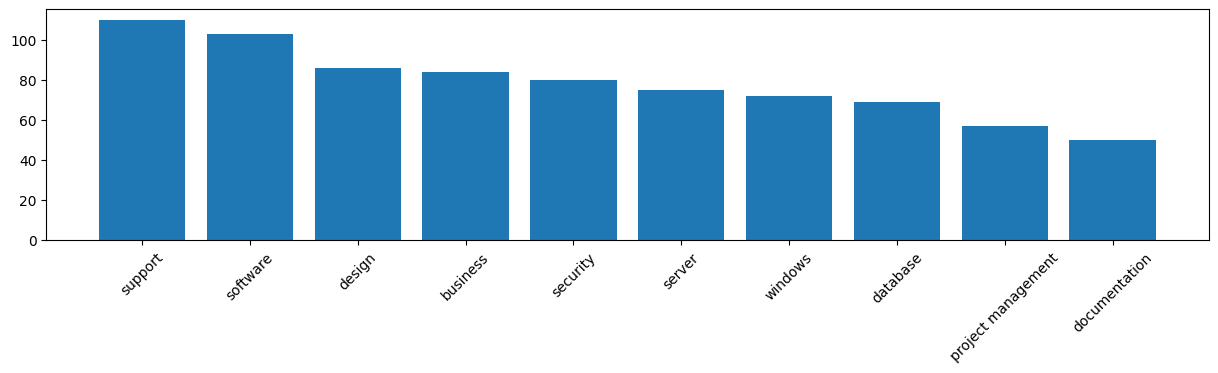

In [22]:
#plot the skills
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.xticks(rotation = 45)
plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recongition

In [23]:
text = df_resume_it["Clean_resume"].iloc[32]

In [24]:
doc = nlp(text)
color = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": color}
displacy.render(doc, style="ent",options =options)

## 7. Load PDF

In [25]:
# !pip install PyPDF2

In [26]:
from PyPDF2 import PdfReader

reader = PdfReader('./datasets/chaklam_resume.pdf')
page = reader.pages[0]
text_test = page.extract_text()
text_test[:30]

'Chaklam Silpasuwanchai Email :'

In [27]:
doc = nlp(text_test)
color = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": color}
displacy.render(doc, style="ent",options =options)

## 8. Add more features

In [30]:
# Matcher will be used to find the more entities in the resume
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [39]:
# add more Email Patterns
matcher.add("EMAIL", [[{"LIKE_EMAIL": True}]], greedy="LONGEST")
matcher.add("URL", [[{"LIKE_URL": True}]], greedy="LONGEST")

In [40]:
# Test the matcher
doc = nlp("My email is st123994@ait.asia")
matches = matcher(doc)
print(matches)

[(17587345535198158200, 3, 4)]


In [41]:
# show the email test result
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(string_id, span.text)

EMAIL st123994@ait.asia


In [42]:
# Test with the resume
doc = nlp(text_test)
matches = matcher(doc)
#print only email
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    if string_id == "EMAIL":
        print(string_id, span.text)

EMAIL chaklam@ait.asia


In [43]:
# Extract of more the entities
def get_entities(text):
    doc = nlp(text)
    matches = matcher(doc)
    features = {
        "PERSON": [],
        "SKILL": [],
        "ORG": [],
        "GPE": [],
        "EMAIL": [],
        "URL":[]
    }

    for ent in doc.ents:
        if ent.label_ in features:
            features[ent.label_].append(ent.text)
    
     
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]
        span = doc[start:end]
        if string_id in features:
            features[string_id].append(span.text)
    return features

In [44]:
get_entities(text_test)

{'PERSON': ['Akaranee',
  'C.',
  'W.',
  'C.',
  'Cheng',
  'P.',
  'Ren',
  'C.',
  'Ren',
  'Wang',
  'Z.',
  'C.',
  'Ren'],
 'SKILL': ['Python',
  'Natural Language Processing',
  'Software Engineering',
  'Testing',
  'Algorithms',
  'AI',
  'question answering',
  'deep learning',
  'Engineering',
  'Computer Science',
  'Engineering',
  'Computer Science',
  'localization',
  'Framework'],
 'ORG': ['Chaklam',
  'PyTorch',
  'SpringBoot',
  'Machine/Deep Learning',
  '•Non-Invasive Blood Glucose',
  '•Medical Imaging',
  '•Asian Institute of Technology Pathumthani',
  'School of Engineering and Technology',
  '•Stamford International University Bangkok',
  'Faculty of Business and Technology',
  '•Kasetsart University Bangkok',
  'Department of Statistics',
  '•Kochi University of Technology Kochi',
  'Postdoctoral Researcher',
  'Education\n•Kochi University of Technology Kochi',
  'GPA',
  '•Asian Institute of Technology Pathumthani',
  'GPA',
  'International Institute of Tec